In [2]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [3]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "planning_budget"
tags = ['2024-02-16-14-42-43', '2024-02-17-00-24-45']
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [4]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 52/52 [00:00<00:00, 362.05it/s]


,Self_Play/Entropies,Training/Value_loss,Self_Play/EMA_Reward,Self_Play/Mean_Entropy,_step,_timestamp,Training/Replay_Buffer_Size,Training/Value_Simularities,_runtime,Self_Play/Rewards,...,expansion_policy,n_steps_learning,selection_policy,value_loss_weight,max_episode_length,policy_loss_weight,sample_batch_ratio,regularization_weight,tree_evaluation_policy,replay_buffer_multiplier
0,"{'bins': [-0.49999859782971423, -0.48437359782...",5.286160,-21.598461,1.402170e-06,14,1.708140e+09,80,0.100874,3599.926475,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",...,fromprior,1,PUCT,1,150,30,1,0.0001,minimal_variance_constraint,10
1,"{'_type': 'histogram', 'values': [2, 0, 0, 0, ...",11.878531,-28.067770,1.975378e-01,14,1.708137e+09,80,0.122731,957.194169,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",...,fromprior,1,PUCT,1,150,30,1,0.0001,default,10
2,"{'bins': [0.09989449183146158, 0.1007179276469...",3.676550,-20.488008,1.229124e-01,14,1.708136e+09,80,0.003733,291.658451,"{'bins': [-17, -16.96875, -16.9375, -16.90625,...",...,fromprior,1,PUCT,1,150,30,1,0.0001,minimal_variance_constraint,10
3,"{'bins': [0.5190865508223002, 0.52068077652525...",5390.549292,-149.722780,5.504175e-01,14,1.708136e+09,80,0.570923,2314.741605,"{'bins': [-249, -245.65625, -242.3125, -238.96...",...,fromprior,1,PUCT,1,150,30,1,0.0001,default,10
4,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",1.239119,-20.570113,2.561099e-01,14,1.708133e+09,80,0.000001,1370.315460,"{'bins': [-25, -24.875, -24.75, -24.625, -24.5...",...,fromprior,1,PUCT,1,150,30,1,0.0001,minimal_variance_constraint,10
5,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",69.726941,-162.972727,6.393524e-01,14,1.708132e+09,80,0.560321,1239.273953,"{'bins': [-150.5, -150.484375, -150.46875, -15...",...,fromprior,1,PUCT,1,150,30,1,0.0001,default,10
6,"{'values': [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",409.071301,-60.225805,9.694304e-02,14,1.708131e+09,80,0.623627,304.590433,"{'bins': [-17, -16.9375, -16.875, -16.8125, -1...",...,fromprior,1,PUCT,1,150,30,1,0.0001,minimal_variance_constraint,10
7,"{'bins': [0.7010435994466145, 0.70195757309595...",739.672162,-310.779866,7.256818e-01,14,1.708130e+09,80,0.574186,188.759248,"{'bins': [-744, -734.71875, -725.4375, -716.15...",...,fromprior,1,PUCT,1,150,30,1,0.0001,default,10
8,"{'bins': [-0.5, -0.484375, -0.46875, -0.453125...",42.380580,-31.938966,2.390527e-24,14,1.708130e+09,80,0.311831,2482.960380,"{'bins': [-15.5, -15.484375, -15.46875, -15.45...",...,fromprior,1,PUCT,1,150,30,1,0.0001,minimal_variance_constraint,10
9,"{'bins': [0.15747844545464768, 0.1587507206104...",12.963801,-25.841257,1.977411e-01,14,1.708128e+09,80,0.144140,399.262028,"{'bins': [-21, -20.9375, -20.875, -20.8125, -2...",...,fromprior,1,PUCT,1,150,30,1,0.0001,default,10


In [5]:
df.columns

Index(['Self_Play/Entropies', 'Training/Value_loss', 'Self_Play/EMA_Reward',
       'Self_Play/Mean_Entropy', '_step', '_timestamp',
       'Training/Replay_Buffer_Size', 'Training/Value_Simularities',
       '_runtime', 'Self_Play/Rewards', 'Training/Learning_Rate',
       'Self_Play/Cumulative_Reward', 'Self_Play/Total_Average_Reward',
       'Self_Play/Max_Reward', 'max_Self_Play/Mean_Reward',
       'Self_Play/Runtime_per_Timestep', '_wandb', 'Self_Play/Reward_STD',
       'Training/Regularization_loss', 'max_Self_Play/Mean_Reward_step',
       'Self_Play/Total_Timesteps', 'Training/Value_and_Policy_loss',
       'Self_Play/Min_Reward', 'Training/Policy_loss',
       'Self_Play/Timesteps_STD', 'Self_Play/Total_Runtime',
       'Self_Play/Mean_Timesteps', 'Self_Play/Timesteps',
       'Self_Play/Mean_Reward', 'Self_Play/Min_Timesteps', 'env_id', 'layers',
       'puct_c', 'lr_gamma', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'activation_fn', 'learn

In [40]:
save_folder = 'outfiles/compute'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

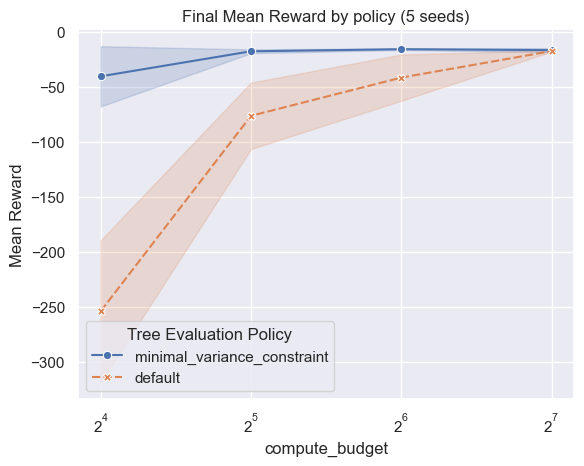

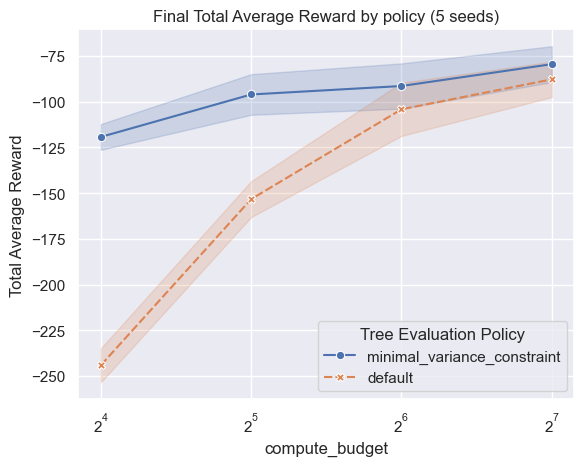

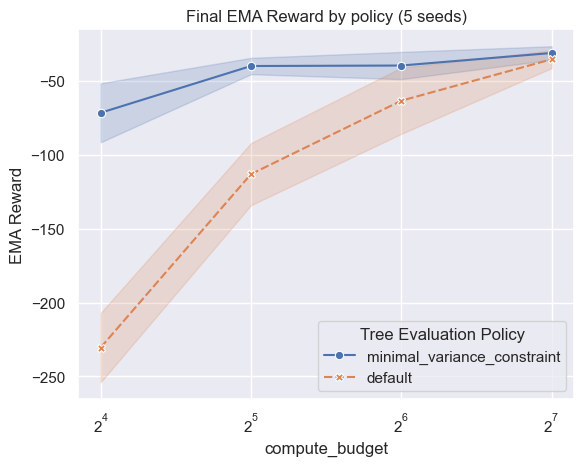

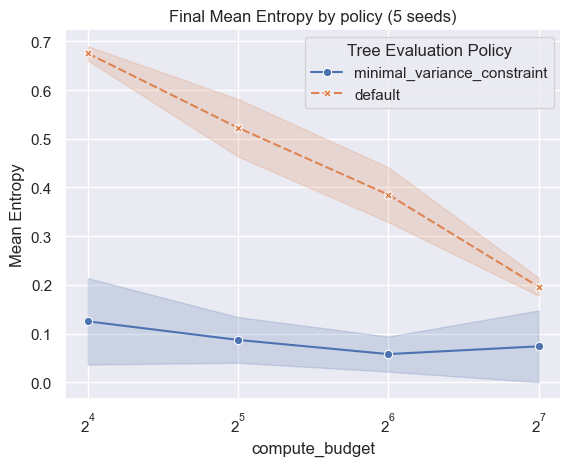

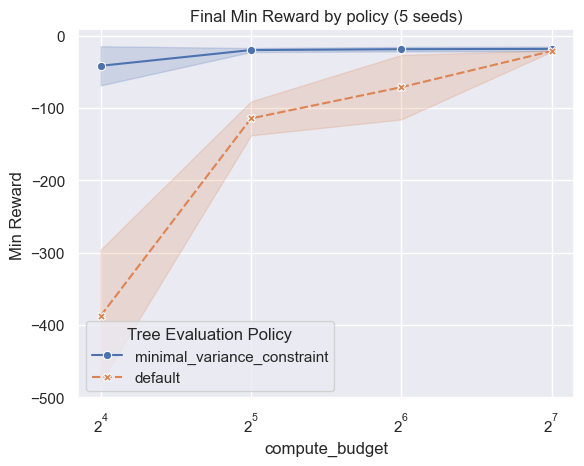

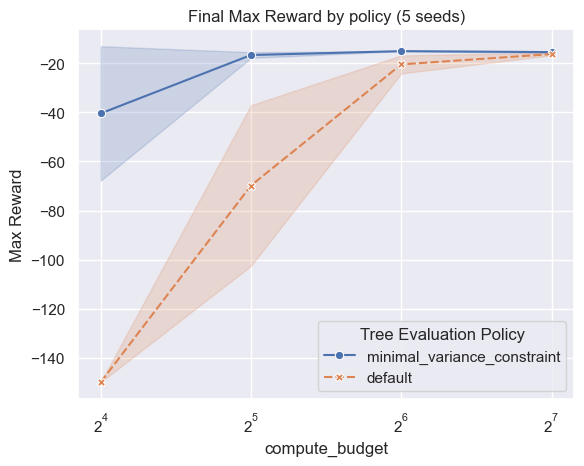

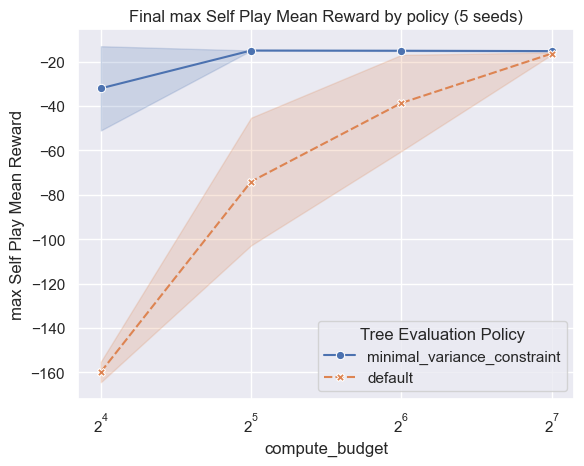

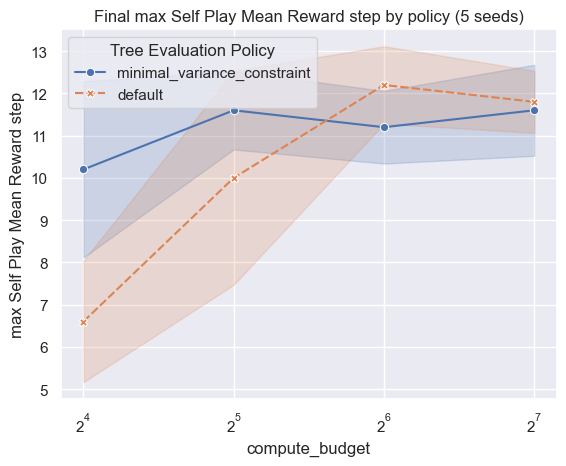

In [44]:


df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

metrics = ['Self_Play/Mean_Reward', "Self_Play/Total_Average_Reward", "Self_Play/EMA_Reward", 'Self_Play/Mean_Entropy', 'Self_Play/Min_Reward',
           'Self_Play/Max_Reward',
           'max_Self_Play/Mean_Reward', 'max_Self_Play/Mean_Reward_step'
           ]


estimator = "mean"
for metric in metrics:
    sns.set_theme(style="darkgrid")

    # Create a line plot with confidence intervals
    sns.lineplot(data=df[df['tree_evaluation_policy'] != 'mvto'],
                 x=x_metric, y=metric,
                hue="tree_evaluation_policy", style="tree_evaluation_policy",
                markers=True, errorbar="se", estimator=estimator)

    # Customize the plot with titles and labels
    plt.title(f'Final {name_fn(metric)} by policy (5 seeds)')
    plt.xlabel(x_metric)  # Replace with actual x-axis label
    plt.ylabel(name_fn(metric))
    plt.legend(title='Tree Evaluation Policy')
    plt.gca().set_xscale('log', base=2)

    # save as pdf
    plt.savefig(f'{save_folder}/{name_fn(metric).replace(" ", "_")}_by_policy_{estimator}.pdf')

    # Show the plot
    plt.show()
